# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type
sum_ride_df = pyber_data_df.loc[:,['type','ride_id']].groupby(["type"]).count()
sum_ride_df

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [4]:
# 2. Get the total drivers for each city type
total_drivers_df = city_data_df.loc[:,['type','driver_count']].groupby(["type"]).sum()
total_drivers_df

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [5]:
#  3. Get the total amount of fares for each city type
total_fare_df = pyber_data_df.loc[:,['type','fare']].groupby(["type"]).sum()
total_fare_df

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [6]:
#  4. Get the average fare per ride for each city type. 
fare_ride_df = pd.merge(total_fare_df,sum_ride_df, on = 'type')
print(fare_ride_df)

fare_ride_df['avg_fare_ride'] = fare_ride_df['fare']/fare_ride_df["ride_id"]
fare_ride_df = fare_ride_df.loc[:,['ride_id', 'avg_fare_ride']]
fare_ride_df


              fare  ride_id
type                       
Rural      4327.93      125
Suburban  19356.33      625
Urban     39854.38     1625


,ride_id,avg_fare_ride
type,,
Rural,125,34.623440
Suburban,625,30.970128
Urban,1625,24.525772


In [7]:
# 5. Get the average fare per driver for each city type.

fare_driver_df = pd.merge(total_fare_df,total_drivers_df, on = 'type')
print(fare_driver_df)

fare_driver_df['fare_driver'] = fare_driver_df['fare']/fare_driver_df["driver_count"]

fare_driver_df

              fare  driver_count
type                            
Rural      4327.93            78
Suburban  19356.33           490
Urban     39854.38          2405


,fare,driver_count,fare_driver
type,,,
Rural,4327.93,78,55.486282
Suburban,19356.33,490,39.502714
Urban,39854.38,2405,16.571468


In [8]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.merge(fare_ride_df,fare_driver_df, on='type')

pyber_summary_df

,ride_id,avg_fare_ride,fare,driver_count,fare_driver
type,,,,,
Rural,125,34.623440,4327.93,78,55.486282
Suburban,625,30.970128,19356.33,490,39.502714
Urban,1625,24.525772,39854.38,2405,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
pyber_summary_df.rename(columns = {'ride_id':'Total Rides',
                                   'driver_count': 'Total Drivers',
                                   'fare':'Total Fares',
                                   'avg_fare_ride':'Average Fare per Ride',
                                   'fare_driver':'Average Fare per Driver'
                                  }, inplace = True )

pd.options.display.float_format = '${:,.2f}'.format

pyber_summary_df

,Total Rides,Average Fare per Ride,Total Fares,Total Drivers,Average Fare per Driver
Rural,125,$34.62,"$4,327.93",78,$55.49
Suburban,625,$30.97,"$19,356.33",490,$39.50
Urban,1625,$24.53,"$39,854.38",2405,$16.57


In [11]:
cols = pyber_summary_df.columns.tolist()
cols = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']

pyber_summary_df = pyber_summary_df[cols] 

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# Print the merged DataFrame for reference.
print(pyber_data_df.head())


                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22 $13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09 $30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00 $33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03 $23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35 $34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  


In [13]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_type_date_df = pyber_data_df.loc[:,['type', "date", 'fare']].groupby(["type", "date"]).sum()
pyber_type_date_df

fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33
...                          ...
Urban 2019-05-08 04:20:00 $21.99
      2019-05-08 04:39:49 $18.45
      2019-05-08 07:29:01 $18.55
      2019-05-08 11:38:35 $19.77
      2019-05-08 13:10:18 $18.04

[2375 rows x 1 columns]

In [14]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

pyber_type_date_df = pyber_type_date_df.reset_index()
pyber_type_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77


In [15]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivoted = pyber_type_date_df.pivot(index='date', columns='type', values='fare')
pivoted

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [16]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.

df = pivoted.loc['2019-01-01':'2019-04-28']
df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [17]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

df.index = pd.to_datetime(df.index)

In [18]:
# 6. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [19]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

weekly_df = df.resample('W').sum()
weekly_df.describe()
weekly_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


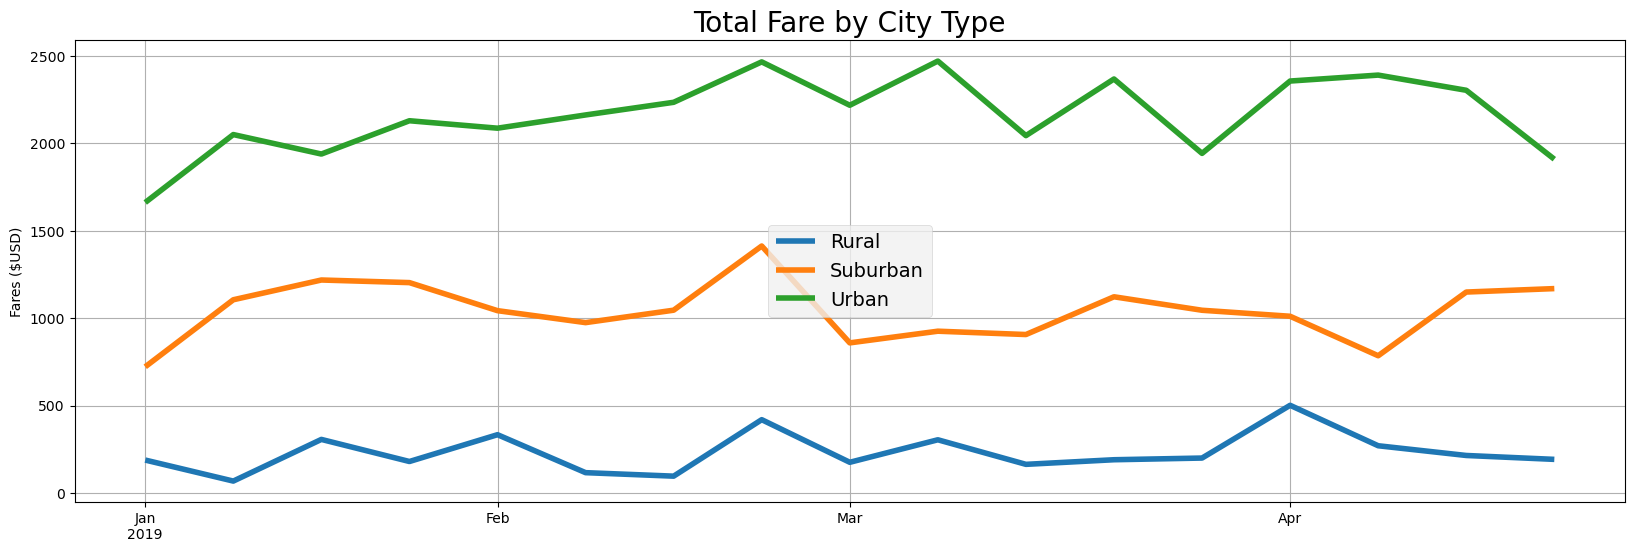

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots(figsize = (20,6))

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax.plot(weekly_df["Rural"],label='Rural')
ax.plot(weekly_df["Suburban"],label='Suburban')
ax.plot(weekly_df["Urban"],label='Urban')

ax.grid(True)
ax.legend()

ax.set(title='Total Fare by City Type', ylabel='Fares ($USD)')
ax.set_xticks(['2019-01-06','2019-02-03','2019-03-03','2019-04-07'])
ax.set_xticklabels(['Jan\n2019','Feb','Mar','Apr'])

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()
